In [2]:
import cobra
from openpyxl import load_workbook, styles, Workbook
import re
import pandas as pd

# Load model
model_path = "P://git/gem_sco/modelS.xml"
# xl_fn = "P://git/gem_sco/modelS.xlsx"
model = cobra.io.read_sbml_model(model_path)
# wb = load_workbook(xl_fn)



In [7]:
solution = model.optimize()
rc = solution.reduced_costs
sp = solution.shadow_prices
#sp.sort_values()
rc.sort_values()
solution.to_frame().sort_values(by = "reduced_costs")


,fluxes,reduced_costs
MPTG2,0.000000,-3.926196e+00
EX_cbl1_e,0.000000,-2.835300e+00
CDAS12,0.000000,-2.155457e+00
EX_cbi_e,0.000000,-2.079029e+00
PGSAai170,0.000000,-1.878941e+00
PGSAi170,0.000000,-1.844591e+00
PGSAi160,0.000000,-1.755281e+00
PGSA160,0.000000,-1.741541e+00
PGSA161,0.000000,-1.710626e+00
PGSA150,0.000000,-1.696886e+00


In [8]:
fva_res = cobra.flux_analysis.flux_variability_analysis(model)


In [15]:
fva_res.sort_values(by = "maximum")
fva_span = fva_res["maximum"] - fva_res["minimum"]
fva_span.sort_values()

MCOATA      -8.706261e-11
PDH         -7.565859e-11
PGM         -5.684386e-11
GLXCL       -4.609091e-11
NAt3_2      -4.376943e-11
NO3t7       -4.376943e-11
NI2t3       -4.376943e-11
ACOAD3f     -4.371904e-11
NO2t2r      -4.349509e-11
BCOATA      -4.102597e-11
NI2t        -4.102597e-11
ACOAD2f     -4.008303e-11
PFK         -3.782930e-11
PYK         -3.751666e-11
COBALT2t3   -3.751666e-11
COBALT2t    -3.751666e-11
ASNt2r      -3.719382e-11
PGK         -3.689982e-11
ECOAH1      -3.554319e-11
3OAS80      -3.052246e-11
3OAS60      -3.052246e-11
Kt2         -2.441936e-11
FE2t2       -2.300410e-11
ASAD        -2.053871e-11
AOBUTDs     -2.036823e-11
Kt3         -1.875833e-11
FE2t3       -1.875833e-11
MN2t3       -1.875833e-11
PPDK        -1.875833e-11
IMPD        -1.738194e-11
                 ...     
R05068       1.000000e+03
R03012       1.000000e+03
R01163       1.000000e+03
R04198       1.000000e+03
TRSARr       1.000000e+03
GLYt2r       1.000000e+03
R05069       1.000000e+03
R04440      

In [63]:
# test fva_span comparison to find what reactions to modify
with model:
    model.reactions.EX_glc_e.bounds = (0, 1000)
    model.reactions.EX_o2_e.bounds = (-2.2, 1000)
    
    model.reactions.EX_gln__L_e.bounds = (-1, 1000)
    fva_gln = cobra.flux_analysis.flux_variability_analysis(model)
    #solution1 = model.optimize()
    
    model.reactions.EX_gln__L_e.bounds = (0, 1000)
    model.reactions.EX_glc_e.bounds = (-1, 1000)
    #model.reactions.EX_glu__L_e.bounds = (-1, 1000)
    #solution2 = model.optimize()
    fva_glu = cobra.flux_analysis.flux_variability_analysis(model)
    

In [65]:
import pandas as pd

# Make fva_span
fva_gln["span"] = fva_gln["maximum"]-fva_gln["minimum"]
fva_glu["span"] = fva_glu["maximum"]-fva_glu["minimum"]


# 
df = pd.DataFrame()
df["gln_span"] = fva_gln["span"]
df["glu_span"] = fva_glu["span"]
#df.sort_values(by = "glu_span")

df_idx = pd.DataFrame()
idx = df["gln_span"]<1
df_idx["gln"] = df["gln_span"][idx]
df_idx["glut"] = df["glu_span"][idx]
df_idx.sort_values(by = "glut").round(decimals = 5)
df_idx["diff"] = df_idx["glut"]-df_idx["gln"]
df_idx.sort_values(by = "diff").round(4)
#ratio = df_idx["glut"]/df_idx["gln"]
#ratio.sort_values()

#fva_gln.sort_values(by = "span")
#fva_glu["span"][fva_gln["span"]<1e-3]

,gln,glut,diff
G6PDA,0.8853,-0.0000,-0.8853
297,0.8853,0.0000,-0.8853
GLUN,0.8853,0.0000,-0.8853
GLUSx,0.8853,0.0000,-0.8853
GF6PTA,0.8853,0.0000,-0.8853
ME2,0.1334,-0.0000,-0.1334
ME1,0.1334,-0.0000,-0.1334
PYK,0.1334,0.0000,-0.1334
MDH,0.1334,0.0000,-0.1334
CTPS1,0.0105,-0.0000,-0.0105


In [384]:
with model:
    s1 = model.optimize()
    s = cobra.flux_analysis.parsimonious.pfba(model)
    diff = s1.fluxes - s.fluxes
    print(diff.sort_values())

R02739      -0.692519
R10907      -0.692519
PGI         -0.692519
AKGDH2      -0.257302
NDPK9       -0.158942
ADK4i       -0.158942
676         -0.087655
ALCD19      -0.033216
R00859      -0.026110
SULRi       -0.026110
UGLT        -0.025824
GALUi       -0.025824
R01827      -0.017307
MTHFR2      -0.014893
SUCOAS      -0.009054
SHSL4       -0.009054
HSST        -0.009054
MECDPDH2    -0.004663
412         -0.003820
EARai70x    -0.003709
EARai150x   -0.003709
FMNRx       -0.003288
EAR80x      -0.002748
EAR60x      -0.002748
EARi140x    -0.002658
EARi60x     -0.002658
EARi100x    -0.002658
EARi120x    -0.002658
TRPS1       -0.002469
EARi160x    -0.002268
               ...   
MDDEP3       0.002250
MCTP1A       0.002250
EARi160y     0.002268
TRPS3        0.002469
TRPS2        0.002469
EARi140y     0.002658
EARi120y     0.002658
EARi60y      0.002658
EARi100y     0.002658
EAR60y       0.002748
EAR80y       0.002748
FMNRx2       0.003288
EARai70y     0.003709
EARai150y    0.003709
OIVD3     

In [385]:

with model:
    #model.reactions.NH4t.bounds = (0, 1000)
    #model.reactions.NH4t.bounds = (0, 1000)
    reaction_list = ["G6PDA","GLUSx", "GLUN", "CTPS2", "297", "ASNN", "GMPS2", "PPM",
                     "HISD", "ALDD2x", "DRPA", "ALLTAMH", "R05554", "GLYCL", "DADA", "GLYK", "ADNUC", 
                     "ANS", "NADS2", "INSH", "XTSNH", "FESR", "426"]#, "ICL"]
    reaction_list_neg = ["PUNP2"]
    for r_id in reaction_list:
        model.reactions.get_by_id(r_id).upper_bound = 0.000
    for r_id in reaction_list_neg:
        model.reactions.get_by_id(r_id).lower_bound = -0.00
    
    
    solution0 = cobra.flux_analysis.parsimonious.pfba(model)
    model.reactions.EX_glc_e.bounds = (0, 1000)
    model.reactions.EX_gln__L_e.bounds = (-1, 1000)
    model.reactions.EX_o2_e.bounds = (-2.2, 1000)
    #model.reactions.NH4t.bounds = (0, 1000)
    #model.reactions.NH4t.bounds = (0, 1000)

    
    solution1 = cobra.flux_analysis.parsimonious.pfba(model)
    model.reactions.EX_gln__L_e.bounds = (0, 1000)
    model.reactions.EX_glu__L_e.bounds = (-1, 1000)
    solution2 = cobra.flux_analysis.parsimonious.pfba(model)
    
    model.reactions.EX_glu__L_e.bounds = (0, 1000)
    model.reactions.EX_leu__L_e.bounds = (-1, 1000)
    solution3 = cobra.flux_analysis.parsimonious.pfba(model)
    
    
    model.reactions.EX_leu__L_e.bounds = (0, 1000)
    model.reactions.EX_rib__D_e.bounds = (-1, 1000)
    solution4 = cobra.flux_analysis.parsimonious.pfba(model)
    
    
        
    model.reactions.EX_rib__D_e.bounds = (0, 1000)
    model.reactions.EX_gly_e.bounds = (-1, 1000)
    solution5 = cobra.flux_analysis.parsimonious.pfba(model)
    
    
    print(solution0.f)
    print(solution1.f)
    print(solution2.f)
    print(solution3.f)
    print(solution4.f)
    print(solution5.f)

75.52627964231154
67.30866325559619
54.564736916128645
62.63894333759092
81.59609215244961
41.344325676603184


In [391]:
import pandas as pd
diff = solution1.fluxes.subtract(solution2.fluxes)
diff_idx = diff[abs(diff) > 0.01]
diff_idx.sort_values()


#df.add("diff", diff == solution1.fluxes)
#df
df = pd.DataFrame()
df["glucose"] = solution0.fluxes
df["gln"] = solution1.fluxes
df["glu"] = solution2.fluxes
df["leu"] = solution3.fluxes
df["rib"] = solution4.fluxes
df["glysine"] = solution5.fluxes
df["diff"] = diff
df["reduced_costs"] = solution1.reduced_costs

df_idx0 = df[abs(df["gln"])>1e-4]
df_idx1 = df_idx0[abs(df_idx0["glu"])<=1e-3]
df_idx2 = df_idx1[abs(df_idx1["leu"])<=1e-3]
df_idx2 = df_idx2[abs(df_idx2["glucose"])<=1e-3]
df_idx2 = df_idx2[abs(df_idx2["rib"])<=1e-3]
df_idx3 = df_idx2[abs(df_idx2["glysine"])<=1e-3]


df_idx3.sort_values(by = "reduced_costs").round(decimals = 4)



,glucose,gln,glu,leu,rib,glysine,diff,reduced_costs
NNDPR,0.0009,0.0003,0.0007,0.0006,0.0009,0.0001,-0.0004,-2.0
APRAUR,0.0007,0.0002,0.0006,0.0005,0.0007,0.0001,-0.0003,-2.0
BTS5,0.0006,0.0002,0.0005,0.0004,0.0006,0.0001,-0.0003,-2.0
DBTS,0.0006,0.0002,0.0005,0.0004,0.0006,0.0001,-0.0003,-2.0
ACPPATai150,0.0008,0.0003,0.0007,0.0006,0.0008,0.0001,-0.0004,-2.0
PSDi160,0.0003,0.0001,0.0003,0.0002,0.0003,0.0000,-0.0002,-2.0
HACD2,0.0008,0.0003,0.0007,0.0006,0.0008,0.0001,-0.0004,-2.0
PAPA160,0.0003,0.0001,0.0003,0.0002,0.0003,0.0000,-0.0002,-2.0
APG3PATai170,0.0008,0.0002,0.0006,0.0005,0.0008,0.0001,-0.0004,-2.0
PAPAi160,0.0003,0.0001,0.0003,0.0002,0.0003,0.0000,-0.0002,-2.0


In [366]:
import numpy as np
with model:
    model.reactions.EX_glc_e.bounds = (0, 1000)
    model.reactions.EX_gln__L_e.bounds = (-1, 1000)
    #model.reactions.EX_gly_e.bounds = (-1, 1000)

    model.reactions.EX_o2_e.bounds = (-2.2, 1000)
    #model.reactions.EX_nh4_e.bounds = (0,1000)
    #model.reactions.EX_leu__L_e.bounds = (-1, 1000)
    
    #model.reactions.NH4t.bounds = (0, 1000)
    reaction_list = ["G6PDA","GLUSx", "GLUN", "CTPS2", "297", "ASNN", "GMPS2", "PPM",
                     "HISD", "ALDD2x", "DRPA", "ALLTAMH", "R05554", "GLYCL", "DADA", "GLYK", "ADNUC", 
                     "ANS", "NADS2", "INSH", "XTSNH", "FESR", "426"]#, "ICL"]
    
    reaction_list_neg = ["PUNP2"]
    for r_id in reaction_list:
        model.reactions.get_by_id(r_id).upper_bound = 0.000
    for r_id in reaction_list_neg:
        model.reactions.get_by_id(r_id).lower_bound = -0.00
    
    
    solution = model.optimize()
    for r_id in reaction_list + reaction_list_neg:
        print(r_id, solution.reduced_costs[r_id])
    print(model.optimize())
    x = solution.reduced_costs * np.sign(solution.fluxes)
    print(x.sort_values())
    #print(model.metabolites.gln__L_c.summary())
    #model.reactions.GLUSx.ub = 0.1
    #print(model.optimize())

G6PDA 0.0848851232241
GLUSx 0.0848851232241
GLUN 0.0848851232241
CTPS2 0.0848851232241
297 0.0848851232241
ASNN 0.0624626378442
GMPS2 0.0848851232241
PPM 0.0128128487885
HISD -0.0325659906709
ALDD2x 0.0329219031372
DRPA -0.0902238102193
ALLTAMH 0.0
R05554 -0.0
GLYCL 0.0
DADA 3.46944695195e-18
GLYK 0.0
ADNUC 0.0
ANS 0.0848851232241
NADS2 0.0848851232241
INSH 0.0
XTSNH 0.0
FESR -3.46944695195e-18
426 0.0
PUNP2 7.8062556419e-18
<Solution 0.025 at 0xa1bdbdf630>
ATPM           -1.281285e-02
Biomass_SCO    -3.348016e-15
PRAGSr         -1.104151e-15
TECA1S         -2.775558e-16
ATPS4r         -2.697495e-16
CS             -2.654127e-16
UDCPDPS        -2.220446e-16
CLPNSII161     -2.220446e-16
PAPPT3         -2.220446e-16
618            -1.821460e-16
EARi100y       -1.665335e-16
APRAUR         -1.526557e-16
557            -1.509209e-16
TECA2S         -1.110223e-16
PSSA160        -1.110223e-16
CLPNSIIi160    -1.110223e-16
CLPNSIIi140    -1.110223e-16
CLPNSII160     -1.110223e-16
CLPNSII150     -

# Current full list of reactions set 0
 reaction_list = ["G6PDA","GLUSx", "GLUN", "CTPS2", "297", "ASNN", "GMPS2", "PPM", "ALLTN", "PUNP3", 
                "RBK", "NTPTP2", "URIH", "ADA", "R06604", "ALCD2y", "IZPN", "FGLU", "HISD", "ALDD2x", "NTPTP1", "DRPA",
                    "PPM2", "573"]#, "ICL"]
    reaction_list_neg = ["ENO", "ALCD2x"]

In [134]:
m_gln = model.metabolites.gln__L_c
#m_gln = model.metabolites.sucsal_c
m_gln = model.metabolites.get_by_id("f6p_c")
m_akg = model.metabolites.akg_c
#m_akg = model.metabolites.nh4_c

In [242]:
np.sign(-30)


-1

In [146]:
with model:
    model.reactions.EX_glc_e.bounds = (0, 1000)
    model.reactions.EX_gln__L_e.bounds = (-1, 1000)
    model.reactions.EX_o2_e.bounds = (-2.2, 1000)
    
    #model.reactions.G6PDA.bounds = (0, 0.1)
    #model.reactions.VALDxi.bounds = (0, 0.1)
    
    #AKG producers
    #model.reactions.VALTA.bounds = (0, 1000)
    #model.reactions.ASPTA.bounds = (0, 1000)
    #model.reactions.PSERT.bounds = (-1000, 1000)
    #model.reactions.ALATA_L.bounds = (0,1000)
    #model.reactions.SUCOAS.bounds = (0, 1000)
    model.reactions.PGI.bounds = (0, 100)
    model.reactions.get_by_id("384").knock_out()
    
    model.reactions.GLUDyi.knock_out() # These two reactions are the same as R297
    model.reactions.GLUN.knock_out()
    model.reactions.get_by_id("R05712").knock_out()
    #model.reactions.get_by_id("297").knock_out()
    
    #model.reactions.GF6PTA.bounds = (0, 0.01) # Essential

    solution = model.optimize()
    flux_reactions_1 = []
    for r in m_gln.reactions:
        flux = solution.x_dict[r.id]
        if abs(flux) > 0.002:
            flux_reactions_1.append(r)
    flux_reactions_2 = []
    for r in m_akg.reactions:
        flux = solution.x_dict[r.id]
        if abs(flux) > 0.00001:
            flux_reactions_2.append(r)
    print(model.summary())
    for r in flux_reactions_1:
        if r.id[:3]!= "Bio":
            flux = solution.x_dict[r.id]
            print(flux, r.id, r.name, r.gene_reaction_rule, r.build_reaction_string())
    print("")
    print("####")
    print("")
        
    for r in flux_reactions_2:
        if r.id[:3]!= "Bio":
            flux = solution.x_dict[r.id]
            print(flux, r.id, r.name, r.gene_reaction_rule, r.build_reaction_string())
            
      

IN FLUXES        OUT FLUXES     OBJECTIVES
---------------  -------------  ---------------------
o2_e      0.699  co2_e  0.7     Biomass_SCO  3.82e-17
gln__L_e  0.175  h2o_e  0.463
                 nh4_e  0.163
                 gua_e  0.035
                 no2_e  0.0125
None

####

-0.0350165172251 ASPTA aspartate transaminase SCO4645 or SCO3658 akg_c + asp__L_c <=> glu__L_c + oaa_c
0.0525247758377 PSERT phosphoserine transaminase SCO4366 3php_c + glu__L_c --> akg_c + pser__L_c
0.420198206701 AKGDH 2-Oxogluterate dehydrogenase SCO5281 and ( SCO2181 or SCO7123 ) and ( SCO0884 or SCO2180 or SCO4919 ) akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.105049551675 GLUSx glutamate synthase (NADH2) SCO1977 or ( SCO2025 and SCO2026 ) akg_c + gln__L_c + h_c + nadh_c --> 2.0 glu__L_c + nad_c
-0.192590844738 ALATA_L L-alanine transaminase SCO4984 or SCO6222 akg_c + ala__L_c <=> glu__L_c + pyr_c
0.245115620576 ICDHyr isocitrate dehydrogenase (NADP) SCO7000 icit_c + nadp_c <=> akg_c + co2_c +

In [11]:
for r in m_gln.reactions:
    if r.id[:3]!= "Bio":
        print(r.id, r.name, r.gene_reaction_rule, r.build_reaction_string())


        

GLUSx glutamate synthase (NADH2) SCO1977 or ( SCO2025 and SCO2026 ) akg_c + gln__L_c + h_c + nadh_c --> 2.0 glu__L_c + nad_c
ASNS1 asparagine synthase (glutamine-hydrolysing) SCO0386 asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c + asn__L_c + glu__L_c + h_c + ppi_c
CYRDAS Cob(II)yrinate a,c-diamide synthase (glutamine-hydrolysing) SCO1852 2.0 atp_c + cobya_c + 2.0 gln__L_c + h2o_c --> 2.0 adp_c + co2dam_c + 2.0 glu__L_c + h_c + ppi_c
HBADAS hydrogenobyrinic acid a,c-diamide synthase (glutamine-hydrolysing) SCO1852 2.0 atp_c + 2.0 gln__L_c + h2o_c + hgbyr_c --> 2.0 adp_c + 2.0 glu__L_c + 2.0 h_c + hgbam_c + ppi_c
ADCS 4-amino-4-deoxychorismate synthase SCO3851 chor_c + gln__L_c --> 4adcho_c + glu__L_c
GMPS2 GMP synthase SCO4785 atp_c + gln__L_c + h2o_c + xmp_c --> amp_c + glu__L_c + gmp_c + 2.0 h_c + ppi_c
ANS anthranilate synthase ( SCO3213 and SCO3214 ) or SCO2043 or SCO2117 chor_c + gln__L_c --> anth_c + glu__L_c + h_c + pyr_c
CBPS carbamoyl-phosphate synthase (glutamine-hydrolysing) 

In [73]:
with model:
    model.reactions.EX_glc_e.bounds = (0, 1000)
    model.reactions.EX_gln__L_e.bounds = (-1, 1000)
    
    #model.reactions.GF6PTA.bounds = (0,1)
    # model.reactions.ADCS.bounds = (0,1)
    # model.reactions.IG3PS.bounds = (0,1)
    model.reactions.GLUSx.knock_out()
    model.reactions.CYRDAS.knock_out()
    model.reactions.ANS.knock_out()
    model.reactions.GLNS.knock_out()
    model.reactions.CTPS2.knock_out()
    #model.reactions.CBPS.knock_out()
    #model.reactions.GLUPRT.knock_out()
    #model.reactions.PRFGS.knock_out()
    #model.reactions.ASNS1.knock_out()
    #df = cobra.flux_analysis.double_reaction_deletion(model, m_gln.reactions)
    #print(df)
    
    solution = model.optimize()
    print(solution.f)
    for r in m_gln.reactions:
        flux = solution.x_dict[r.id]
        if abs(flux) > 1e-3 and r.id[:3]!= "Bio":
            print(r.id, flux, r.build_reaction_string())

0.05987646572307186
ASNS1 0.0109831401076 asp__L_c + atp_c + gln__L_c + h2o_c --> amp_c + asn__L_c + glu__L_c + h_c + ppi_c
ADCS 0.00106466343702 chor_c + gln__L_c --> 4adcho_c + glu__L_c
CBPS 0.0296030444064 2.0 atp_c + gln__L_c + h2o_c + hco3_c --> 2.0 adp_c + cbp_c + glu__L_c + 2.0 h_c + pi_c
GF6PTA 0.906193337446 f6p_c + gln__L_c --> gam6p_c + glu__L_c
GLUPRT 0.0189612001535 gln__L_c + h2o_c + prpp_c --> glu__L_c + ppi_c + pram_c
GLNabc 1.0 atp_c + gln__L_e + h2o_c --> adp_c + gln__L_c + h_c + pi_c
PRFGS 0.0189612001535 atp_c + fgam_c + gln__L_c + h2o_c --> adp_c + fpram_c + glu__L_c + h_c + pi_c
IG3PS 0.00478472837593 gln__L_c + prlp_c --> aicar_c + eig3p_c + glu__L_c + h_c


                GLUSx  ASNS1        CYRDAS        HBADAS  ADCS         GMPS2  \
GLUSx        0.059876    0.0  5.987647e-02  0.000000e+00   0.0  5.987647e-02   
ASNS1        0.000000    0.0  0.000000e+00  0.000000e+00   0.0  0.000000e+00   
CYRDAS       0.059876    0.0  5.987647e-02  3.294741e-11   0.0  5.987647e-02   
HBADAS       0.000000    0.0  3.294741e-11  3.294741e-11   0.0 -5.288588e-15   
ADCS         0.000000    0.0  0.000000e+00  0.000000e+00   0.0  0.000000e+00   
GMPS2        0.059876    0.0  5.987647e-02 -5.288588e-15   0.0  5.987647e-02   
ANS          0.059876    0.0  5.987647e-02 -5.288588e-15   0.0  5.987647e-02   
Biomass_SCO  0.000000    0.0  0.000000e+00  0.000000e+00   0.0  0.000000e+00   
CBPS         0.000000    0.0  0.000000e+00  0.000000e+00   0.0  0.000000e+00   
PYDXPS       0.000000    0.0  0.000000e+00  0.000000e+00   0.0  0.000000e+00   
GF6PTA       0.000000    0.0  0.000000e+00  0.000000e+00   0.0  0.000000e+00   
GLUPRT       0.000000    0.0  0.000000e+

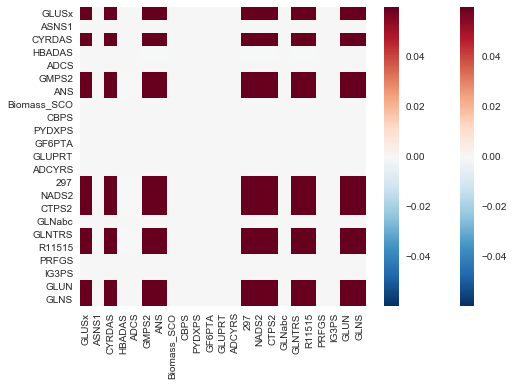

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


pdf = pd.DataFrame.from_dict(df["data"])
pdf.columns = df["y"]
pdf.index = df["x"]
print(pdf)

import seaborn as sns
sns.heatmap(pdf)
plt.show()

In [3]:
m_d = model.metabolites.glu__D_c
m_l = model.metabolites.glu__L_c
m_akg = model.metabolites.akg_c

model.metabolites.glu__L_e.reactions
m_akg.reactions

frozenset({<Reaction AKGDH at 0x7ccc8bf860>,
           <Reaction ALATA_L at 0x7ccc7b90b8>,
           <Reaction ILETA at 0x7cccb7e0b8>,
           <Reaction SDPTA at 0x7cccad5f98>,
           <Reaction VALTA at 0x7cccb86940>,
           <Reaction HSTPT at 0x7ccc9ff978>,
           <Reaction TAUDO at 0x7ccc7f4208>,
           <Reaction OHPBAT at 0x7ccc912208>,
           <Reaction ASPTA at 0x7ccc7b9f98>,
           <Reaction EHGLAT at 0x7ccc807b38>,
           <Reaction PTRCTA at 0x7ccc80db38>,
           <Reaction AKGDH2 at 0x7ccc8bfb38>,
           <Reaction APTNAT at 0x7cccaccbe0>,
           <Reaction PHETA1 at 0x7cccb4cbe0>,
           <Reaction GLUSx at 0x7ccc979c18>,
           <Reaction DAPAT at 0x7cccad1438>,
           <Reaction AKGt2r at 0x7cccaddf98>,
           <Reaction ICDHyr at 0x7ccc8c34e0>,
           <Reaction CDAS18 at 0x7ccc81acf8>,
           <Reaction GLUDyi at 0x7ccc9794e0>,
           <Reaction TYRTA at 0x7cccb544e0>,
           <Reaction R00621 at 0x7cccbf04e0

In [18]:
model.reactions.EX_glc_e.bounds = (0, 1000)
model.reactions.EX_glu__L_e.bounds = (-1, 1000)



In [13]:
#model.reactions.GLUDxi.knock_out()
#model.reactions.GLUDyi.knock_out()
#model.reactions.GLUR.knock_out()
#model.reactions.GLUN.knock_out()
#model.reactions.ILETA.knock_out()
#model.reactions.ALATA_L.knock_out()
#model.reactions.GLUDC.knock_out()
#model.reactions.GLU5K.knock_out()
#model.reactions.GLTna.knock_out()
#model.reactions.GLUt2r.knock_out()
#model.reactions.get_by_id("466").knock_out()
r_id_list = ["GLUDxi", "GLUDyi", "GLUR", "GLUN", "ALATA_L", "GLUDC", "GLU5K", "466"]

r_list = [model.reactions.get_by_id(x) for x in r_id_list]

In [21]:
#cobra.flux_analysis.single_reaction_deletion(model, r_list)
d_ess = cobra.flux_analysis.double_reaction_deletion(model, r_list, return_frame = True)

In [39]:
a = d_ess[d_ess <1e-5]

In [47]:
a = list(d_ess[d_ess < 1e-5].stack().index)
a
set((a,b) if a<=b else (b,a) for a,b in a)

[('GLUR', '466'), ('466', 'GLUR')]

In [122]:
flow_list = []
m = model.metabolites.glu__L_c
#for r in m_l.reactions:
for r in ml2:
    flow = solution.x_dict[r.id]
    if flow != 0:
        mult = r.metabolites[m]
        flow = -1 * mult * flow
        flow_list.append([r.id, flow])

flow_list.sort(key = lambda x: x[1])
print(*flow_list, sep = "\n")

['GLUDyi', -0.17764046089527941]
['PTRCTA', -1.1342502201902838e-17]
['GLU5K', 1.1069490840947269e-17]
['CDAS15', 0.011599877638421487]
['CDAS16', 0.011599877638421491]


In [163]:

solution = model.optimize()
print(model.summary())

IN FLUXES            OUT FLUXES          OBJECTIVES
-------------------  ------------------  -------------------
o2_e       1.74      h2o_e     3.6       Biomass_SCO  0.0754
glc__D_e   0.8       co2_e     1.82
nh4_e      0.67      h_e       0.617
pi_e       0.0766    5drib_c   0.00384
so4_e      0.0264    5mtr_e    0.00252
k_e        0.014     amob_c    0.000629
fe2_e      0.00535   4crsol_c  0.000363
mg2_e      0.000622  dalua_c   9.7e-05
ca2_e      0.000373
cl_e       0.000373
mobd_e     0.000274
cobalt2_e  9.88e-05
cu2_e      5.08e-05
mn2_e      4.96e-05
zn2_e      2.44e-05
ni2_e      2.31e-05
None


In [ ]:
srd = cobra.flux_analysis.double_reaction_deletion(model, tolerance_feasibility = 1e-9)

In [ ]:
print(type(srd))

In [102]:
srd.columns.values

array(['flux', 'status'], dtype=object)

In [103]:
essential = srd[srd["flux"] <1e-5]

In [104]:
ess_r = list(essential.index.values)

In [109]:
ml2 = [x for x in m_l.reactions if not x.id in ess_r]
print(ml2)

[<Reaction APTNAT at 0x89a82b9828>, <Reaction ORNTA at 0x89a8300048>, <Reaction PTRCTA at 0x89957d9860>, <Reaction DABAAT at 0x89a843f860>, <Reaction P5CD at 0x89957d9898>, <Reaction GLUDxi at 0x89a805a080>, <Reaction ALATA_L at 0x89a83f70b8>, <Reaction CDAS16 at 0x89a82350b8>, <Reaction OHPBAT at 0x89a80848d0>, <Reaction GLUDC at 0x89a805a0f0>, <Reaction CTPS2 at 0x89a826a908>, <Reaction GLUN at 0x89a8057940>, <Reaction EHGLAT at 0x89a8294198>, <Reaction FGLU at 0x89a80099e8>, <Reaction 297 at 0x89957b91d0>, <Reaction GLTna at 0x89957d2278>, <Reaction GTHRDH at 0x89a9511a90>, <Reaction R09399 at 0x89957f32e8>, <Reaction APAT2r at 0x89a83f4b00>, <Reaction GLUR at 0x89a816fb00>, <Reaction ACGS at 0x89a828b358>, <Reaction GLUabc at 0x89a7f66c50>, <Reaction GLU5K at 0x89a83664a8>, <Reaction ANS at 0x89a819c4a8>, <Reaction DAPAT at 0x89a82bd518>, <Reaction ABTA at 0x89a83edda0>, <Reaction NADS2 at 0x89a9493e10>, <Reaction CDAS15 at 0x89a8235630>, <Reaction GLUDyi at 0x89a8057e48>, <Reactio

In [164]:
cobra.flux_analysis.single_reaction_deletion?


In [179]:
srd[srd["flux"] <1e-5]


,flux,status
2MBCOATA,0.000000e+00,optimal
3HAD100,1.064223e-16,optimal
3HAD110,-1.771195e-17,optimal
3HAD120,1.495466e-17,optimal
3HAD121,-4.644708e-18,optimal
3HAD130,-1.771195e-17,optimal
3HAD140,1.495466e-17,optimal
3HAD141,-4.644708e-18,optimal
3HAD150,-1.771195e-17,optimal
3HAD160,-5.037855e-17,optimal


In [173]:
model.optimize(tolerance_feasibility = 1e-9)


,fluxes,reduced_costs
ACTS1,0.000000,0.000000e+00
ACTS10,0.000000,-8.131516e-18
ACTS11,0.000000,0.000000e+00
ACTS12,0.000000,0.000000e+00
ACTS13,0.000000,-8.131516e-18
ACTS14,0.000000,0.000000e+00
ACTS15,0.000000,-1.545746e-02
ACTS16,0.000000,0.000000e+00
ACTS2,0.000000,4.737963e-17
ACTS3,0.000000,-8.131516e-18


In [48]:
cobra.flux_analysis.double_reaction_deletion?